# Sentiment analysis with the perceptron algorithm

### Importing the necessary packages

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/perceptron_algorithm

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 109 (delta 42), reused 94 (delta 27), pack-reused 0
Receiving objects: 100% (109/109), 33.19 MiB | 22.98 MiB/s, done.
Resolving deltas: 100% (42/42), done.
/content/machine_learning_1/perceptron_algorithm


In [2]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [3]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

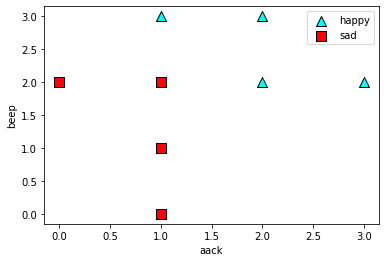

In [4]:
# Plotting the points
utils.plot_points(features, labels)

# Uncomment the following line to see a good line fit for this data.
#utils.draw_line(1,1,-3.5)

### Coding the perceptron trick

In [16]:
def step(x):
    ## TODO ##
    # implement step function
    if x < 0:
      return 0
    return 1

def score(weights, bias, features):
    ## TODO ##
    # implement score calculation

    output = np.array(weights).dot(features)+bias
    return output

def prediction(weights, bias, features):
    ## TODO ##
    # implement prediction calculation using step and score functions
    
    return step(score(weights, bias, features))

def error(weights, bias, features, label):
    ## TODO ##
    # implement error calculation using prediction and score functions
    predict = prediction(weights, bias, features)
    if predict == label :
      return 0
    return abs(score(weights, bias, features))

def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)

In [18]:
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    ## TODO ##
    # update the weights and bias using a single data sample
    weights += learning_rate*(label - prediction(weights, bias, features))*features
    bias += learning_rate*(label - prediction(weights, bias, features))


    return weights, bias

### Running the perceptron algorithm

In [14]:
random.seed(0)
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for epoch in range(epochs):
        # Coment the following line to draw only the final classifier
        utils.draw_line(weights[0], weights[1], bias, color='grey', linewidth=1.0, linestyle='dotted')
        error = mean_perceptron_error(weights, bias, features, labels)
        errors.append(error)
        i = random.randint(0, len(features)-1)
        weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
    utils.draw_line(weights[0], weights[1], bias)
    utils.plot_points(features, labels)
    plt.ylim([-2, 5])
    plt.show()
    plt.scatter(range(epochs), errors)
    return weights, bias

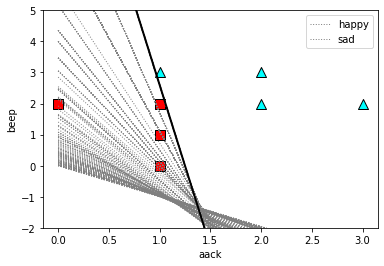

(array([0.52, 0.05]), -0.6500000000000004)

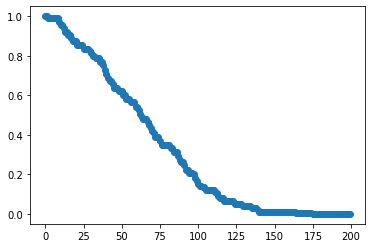

In [19]:
perceptron_algorithm(features, labels)

### The perceptron algorithm using SKlearn

In [20]:
from sklearn.linear_model import Perceptron
## TODO ##
# Use SKlearn to train perceptron algorithm
clf=Perceptron().fit(features, labels)

In [21]:
clf.score(features, labels)

1.0

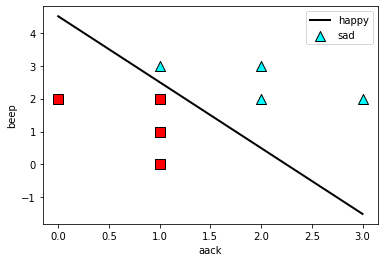

In [22]:
weights = clf.coef_
bias = clf.intercept_
utils.draw_line(weights[0][0], weights[0][1], bias)
utils.plot_points(features, labels)
plt.show()